In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve
import warnings
warnings.filterwarnings("ignore")

# Exploratory Data Analysis(EDA)

In [2]:
df = pd.read_csv("credit_train.csv")

In [3]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [4]:
df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [5]:
df['Loan Status'].value_counts()

Fully Paid     77361
Charged Off    22639
Name: Loan Status, dtype: int64

In [6]:
df.shape

(100514, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [8]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


<AxesSubplot:title={'center':'Correlation for every column'}>

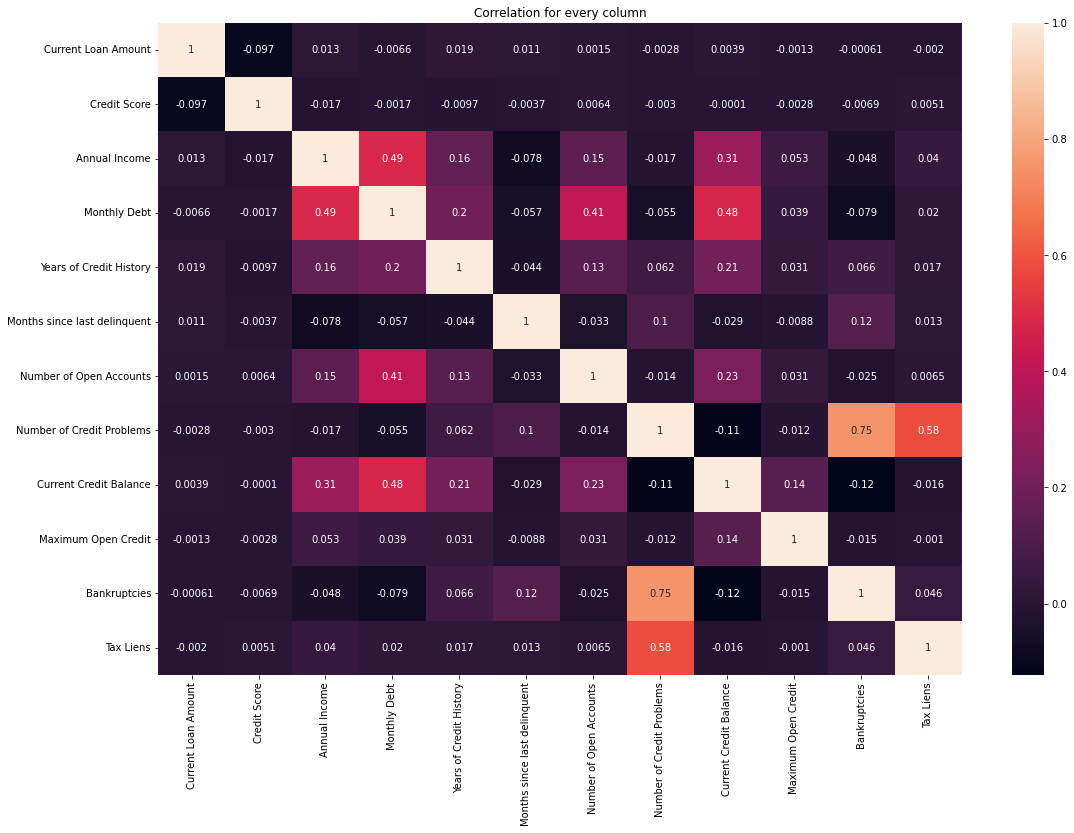

In [9]:
plt.figure(figsize=(18,12))
plt.title('Correlation for every column')
sns.heatmap(df.corr(),annot=True)

# Data Cleaning

In [10]:
df.drop("Loan ID",axis=1,inplace=True)
df.drop("Customer ID",axis=1,inplace=True)
# df.drop("Purpose",axis=1,inplace=True)
# df.drop("Home Ownership",axis=1,inplace=True)

In [11]:
df['Purpose'].value_counts()

Debt Consolidation      78552
other                    6037
Home Improvements        5839
Other                    3250
Business Loan            1569
Buy a Car                1265
Medical Bills            1127
Buy House                 678
Take a Trip               573
major_purchase            352
small_business            283
moving                    150
wedding                   115
vacation                  101
Educational Expenses       99
renewable_energy           10
Name: Purpose, dtype: int64

In [12]:
df["Home Ownership"].value_counts()

Home Mortgage    48410
Rent             42194
Own Home          9182
HaveMortgage       214
Name: Home Ownership, dtype: int64

In [13]:
df['Home Ownership'] = df['Home Ownership'].str.replace(" ", "")

In [14]:
df['Purpose'] = df['Purpose'].str.replace(" ", "")

In [15]:
df['Term'] = df['Term'].str.replace(" ", "")

In [16]:
df['Loan Status'] = df['Loan Status'].str.replace(" ", "")

In [17]:
df['Years in current job'].head()

0      8 years
1    10+ years
2      8 years
3      3 years
4      5 years
Name: Years in current job, dtype: object

In [18]:
df['Years in current job'] = df['Years in current job'].str.replace("years","")

In [19]:
df['Years in current job'] = df['Years in current job'].str.replace("+","")

In [20]:
df['Years in current job'].head()

0     8 
1    10 
2     8 
3     3 
4     5 
Name: Years in current job, dtype: object

In [21]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,FullyPaid,445412.0,ShortTerm,709.0,1167493.0,8,HomeMortgage,HomeImprovements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,FullyPaid,262328.0,ShortTerm,NaN,NaN,10,HomeMortgage,DebtConsolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,FullyPaid,99999999.0,ShortTerm,741.0,2231892.0,8,OwnHome,DebtConsolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,FullyPaid,347666.0,LongTerm,721.0,806949.0,3,OwnHome,DebtConsolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,FullyPaid,176220.0,ShortTerm,NaN,NaN,5,Rent,DebtConsolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


# Checking the NULL Value

In [22]:
df.isnull()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
100510,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
100511,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
100512,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [23]:
df.isnull().sum()

Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

# Handling Null values

In [24]:
df.dropna(subset=['Months since last delinquent'], inplace=True)

In [25]:
df.dropna(subset=['Years in current job'], inplace=True)

In [26]:
mean_income = df['Annual Income'].mean()

In [27]:
df['Annual Income'].fillna(mean_income,inplace=True)

In [28]:
mean_score = df['Credit Score'].mean()

In [29]:
df['Credit Score'].fillna(mean_score,inplace=True)

In [30]:
mean_credit = df['Maximum Open Credit'].mean()

In [31]:
df['Maximum Open Credit'].fillna(mean_credit,inplace=True)

In [32]:
df.dropna(subset=['Bankruptcies'], inplace=True)

In [33]:
df.isnull().sum()

Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

# Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le = LabelEncoder()

In [36]:
from pandas.core.dtypes.common import is_numeric_dtype
for i in df.columns:
    if is_numeric_dtype(df[i]):
        continue
    else:
        df[i] = le.fit_transform(df[i])

In [37]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
1,1,262328.0,1,1056.180561,1.464039e+06,1,1,3,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,1,99999999.0,1,741.000000,2.231892e+06,8,2,3,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
6,1,217646.0,1,730.000000,1.184194e+06,10,1,3,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
7,0,648714.0,0,1056.180561,1.464039e+06,10,1,1,14806.13,8.2,8.0,15.0,0.0,193306.0,864204.0,0.0,0.0
8,1,548746.0,1,678.000000,2.559110e+06,2,3,3,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0


# scaling

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
mm = MinMaxScaler(feature_range=(0, 1))

In [40]:
df["Current Loan Amount"] = mm.fit_transform(df[["Current Loan Amount"]])

In [41]:
df["Credit Score"] = mm.fit_transform(df[["Credit Score"]])

In [42]:
df["Annual Income"] = mm.fit_transform(df[["Annual Income"]])

In [43]:
df["Monthly Debt"] = mm.fit_transform(df[["Monthly Debt"]])

In [44]:
df["Current Credit Balance"] = mm.fit_transform(df[["Current Credit Balance"]])

In [45]:
df["Maximum Open Credit"] = mm.fit_transform(df[["Maximum Open Credit"]])

In [46]:
df["Years of Credit History"] = mm.fit_transform(df[["Years of Credit History"]])

In [47]:
df["Months since last delinquent"] = mm.fit_transform(df[["Months since last delinquent"]])

In [48]:
df["Number of Open Accounts"] = mm.fit_transform(df[["Number of Open Accounts"]])

In [49]:
df1 = df.copy()

In [50]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
1,1,0.002409,1,0.068041,0.044025,1,1,3,0.145361,0.259370,0.045455,0.729167,0.0,0.029997,0.001066,0.0,0.0
2,1,1.000000,1,0.022527,0.069014,8,2,3,0.127481,0.166417,0.164773,0.375000,1.0,0.038869,0.000940,0.0,0.0
6,1,0.001962,1,0.020939,0.034918,10,1,3,0.047390,0.236882,0.056818,0.270833,1.0,0.015935,0.000341,1.0,0.0
7,0,0.006274,0,0.068041,0.044025,10,1,1,0.064639,0.065967,0.045455,0.312500,0.0,0.025214,0.001083,0.0,0.0
8,1,0.005274,1,0.013430,0.079663,2,3,3,0.081465,0.281859,0.187500,0.083333,0.0,0.057022,0.000695,0.0,0.0


In [51]:
x = df.drop('Loan Status',axis=1)
y = df['Loan Status']

# corelation based feature selection

In [52]:
correlation_matrix = df.corr()

In [53]:
# Set the correlation threshold
threshold = 0.1

# Calculate the correlation matrix with the target variable
correlation_with_target = df.corr()['Loan Status']

# Sort the correlation values in descending order
sorted_correlation = correlation_with_target.abs().sort_values(ascending=False)

# Select the top 9 features
selected_features = sorted_correlation.index[1:10]  # Exclude the target variable itself

# Print the selected features
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['Credit Score', 'Current Loan Amount', 'Term', 'Home Ownership',
       'Annual Income', 'Years of Credit History', 'Number of Open Accounts',
       'Years in current job', 'Monthly Debt'],
      dtype='object')


In [54]:
abs(correlation_with_target)

Loan Status                     1.000000
Current Loan Amount             0.185657
Term                            0.113970
Credit Score                    0.411872
Annual Income                   0.052723
Years in current job            0.023506
Home Ownership                  0.055257
Purpose                         0.003534
Monthly Debt                    0.019426
Years of Credit History         0.034717
Months since last delinquent    0.014026
Number of Open Accounts         0.027217
Number of Credit Problems       0.006585
Current Credit Balance          0.008301
Maximum Open Credit             0.007586
Bankruptcies                    0.002935
Tax Liens                       0.013837
Name: Loan Status, dtype: float64

In [55]:
# Create a new DataFrame containing only the selected features
df_selected = df[selected_features]

# Display the new DataFrame
print("DataFrame with Selected Features:")
df_selected.head()


DataFrame with Selected Features:


,Credit Score,Current Loan Amount,Term,Home Ownership,Annual Income,Years of Credit History,Number of Open Accounts,Years in current job,Monthly Debt
1,0.068041,0.002409,1,1,0.044025,0.259370,0.729167,1,0.145361
2,0.022527,1.000000,1,2,0.069014,0.166417,0.375000,8,0.127481
6,0.020939,0.001962,1,1,0.034918,0.236882,0.270833,10,0.047390
7,0.068041,0.006274,0,1,0.044025,0.065967,0.312500,10,0.064639
8,0.013430,0.005274,1,3,0.079663,0.281859,0.083333,2,0.081465


In [56]:
x = df_selected

In [57]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42) 

In [58]:
xtrain.head()

,Credit Score,Current Loan Amount,Term,Home Ownership,Annual Income,Years of Credit History,Number of Open Accounts,Years in current job,Monthly Debt
37209,0.016751,0.001392,1,1,0.026925,0.130435,0.187500,5,0.109953
57537,0.018628,0.000887,1,3,0.043006,0.103448,0.208333,4,0.059943
61708,0.068041,0.007345,0,1,0.044025,0.311844,0.375000,3,0.349333
90649,0.019928,0.001530,1,2,0.039286,0.167916,0.291667,3,0.046047
72199,0.019350,0.000461,1,1,0.037524,0.130435,0.166667,8,0.085091


In [59]:
y.head()

1    1
2    1
6    1
7    0
8    1
Name: Loan Status, dtype: int32

In [60]:
from sklearn.svm import SVC

In [61]:
model = SVC()

In [62]:
model.fit(xtrain,ytrain)

SVC()

In [63]:
model.score(xtest,ytest)

0.8211727842435094

In [64]:
df.corr().abs()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Loan Status,1.000000,0.185657,0.113970,0.411872,0.052723,0.023506,0.055257,0.003534,0.019426,0.034717,0.014026,0.027217,0.006585,0.008301,0.007586,0.002935,0.013837
Current Loan Amount,0.185657,1.000000,0.061204,0.090094,0.014586,0.002833,0.011820,0.002384,0.001902,0.016363,0.010664,0.004538,0.001051,0.008644,0.000437,0.001080,0.003146
Term,0.113970,0.061204,1.000000,0.035756,0.084006,0.013396,0.102279,0.051594,0.132101,0.028277,0.014690,0.064140,0.025299,0.095380,0.004948,0.027458,0.003570
Credit Score,0.411872,0.090094,0.035756,1.000000,0.019614,0.004049,0.014206,0.013297,0.007951,0.010215,0.002982,0.011735,0.001120,0.001863,0.003878,0.006639,0.008322
Annual Income,0.052723,0.014586,0.084006,0.019614,1.000000,0.036784,0.158283,0.006030,0.498750,0.157703,0.069032,0.124007,0.015653,0.316945,0.053566,0.055479,0.054040
Years in current job,0.023506,0.002833,0.013396,0.004049,0.036784,1.000000,0.073165,0.002853,0.051013,0.106321,0.027328,0.008533,0.009329,0.039209,0.010178,0.008598,0.005284
Home Ownership,0.055257,0.011820,0.102279,0.014206,0.158283,0.073165,1.000000,0.030029,0.167864,0.159704,0.055258,0.103023,0.007622,0.162565,0.033202,0.021500,0.004099
Purpose,0.003534,0.002384,0.051594,0.013297,0.006030,0.002853,0.030029,1.000000,0.060129,0.025803,0.014090,0.079210,0.010223,0.067790,0.001387,0.002032,0.010598
Monthly Debt,0.019426,0.001902,0.132101,0.007951,0.498750,0.051013,0.167864,0.060129,1.000000,0.174347,0.056239,0.377808,0.048282,0.444503,0.047152,0.074344,0.027742
Years of Credit History,0.034717,0.016363,0.028277,0.010215,0.157703,0.106321,0.159704,0.025803,0.174347,1.000000,0.043777,0.095817,0.020581,0.201995,0.031758,0.022357,0.007618


<AxesSubplot:title={'center':'Correlation for every column'}>

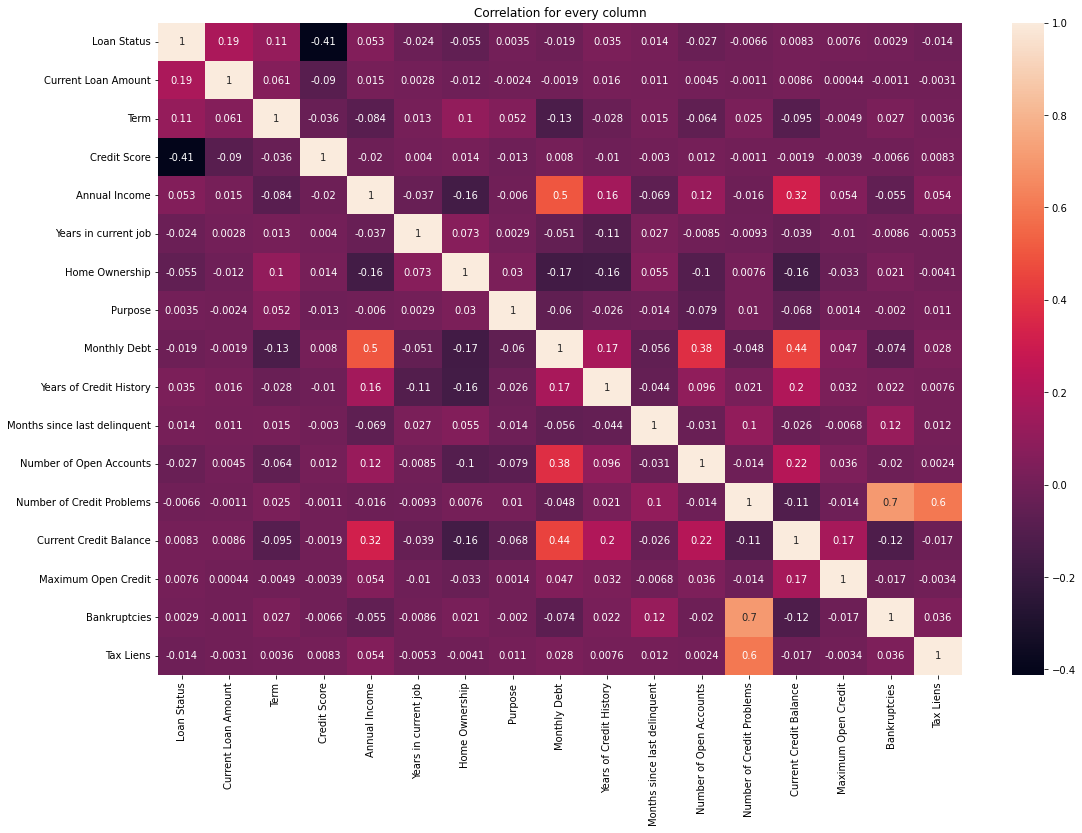

In [65]:
plt.figure(figsize=(18,12))
plt.title('Correlation for every column')
sns.heatmap(df.corr(),annot=True)

# Information Gain

In [66]:
from sklearn.feature_selection import mutual_info_classif

In [67]:
x = df.drop('Loan Status',axis=1)
y = df['Loan Status']

In [68]:
# Calculate the information gain for each feature
info_gains = mutual_info_classif(x, y)

In [69]:
feature_info_gains = pd.DataFrame({'Feature': x.columns, 'Information Gain': info_gains})

In [70]:
sorted_features = feature_info_gains.sort_values(by='Information Gain', ascending=False)

In [71]:
sorted_features

,Feature,Information Gain
2,Credit Score,0.085968
0,Current Loan Amount,0.046287
13,Maximum Open Credit,0.022574
7,Monthly Debt,0.022147
12,Current Credit Balance,0.020836
3,Annual Income,0.013015
1,Term,0.006713
6,Purpose,0.003409
4,Years in current job,0.002076
5,Home Ownership,0.001576


In [72]:
# Select the top-k features with the highest information gains
k = 11  # Set the desired number of selected features
selected_features = sorted_features.head(k)['Feature'].tolist()

In [73]:
selected_features

['Credit Score',
 'Current Loan Amount',
 'Maximum Open Credit',
 'Monthly Debt',
 'Current Credit Balance',
 'Annual Income',
 'Term',
 'Purpose',
 'Years in current job',
 'Home Ownership',
 'Years of Credit History']

In [74]:
# Create a new DataFrame containing only the selected features
df_selected = df[selected_features]

# Display the new DataFrame
print("DataFrame with Selected Features:")
df_selected.head()

DataFrame with Selected Features:


,Credit Score,Current Loan Amount,Maximum Open Credit,Monthly Debt,Current Credit Balance,Annual Income,Term,Purpose,Years in current job,Home Ownership,Years of Credit History
1,0.068041,0.002409,0.001066,0.145361,0.029997,0.044025,1,3,1,1,0.259370
2,0.022527,1.000000,0.000940,0.127481,0.038869,0.069014,1,3,8,2,0.166417
6,0.020939,0.001962,0.000341,0.047390,0.015935,0.034918,1,3,10,1,0.236882
7,0.068041,0.006274,0.001083,0.064639,0.025214,0.044025,0,1,10,1,0.065967
8,0.013430,0.005274,0.000695,0.081465,0.057022,0.079663,1,3,2,3,0.281859


In [75]:
x = df_selected

In [76]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42) 

In [77]:
model2 = SVC()

In [78]:
model2.fit(xtrain,ytrain)

SVC()

In [79]:
model2.score(xtest,ytest)

0.8211727842435094

# Chi square test

In [80]:
from sklearn.feature_selection import SelectKBest, chi2

In [81]:
# Apply the chi-square test to calculate the chi-square statistic for each feature
selector = SelectKBest(score_func=chi2, k='all')
selector.fit(x, y)

SelectKBest(k='all', score_func=<function chi2 at 0x0000026DF5AFE3B0>)

In [82]:
# Get the chi-square scores and p-values for each feature
chi2_scores = selector.scores_
p_values = selector.pvalues_

In [83]:
# Create a DataFrame to store feature names, chi-square scores, and p-values
feature_scores = pd.DataFrame({'Feature': x.columns, 'Chi-square Score': chi2_scores, 'p-value': p_values})

In [84]:
feature_scores.head()

,Feature,Chi-square Score,p-value
0,Credit Score,3921.067889,0.000000e+00
1,Current Loan Amount,1330.969084,2.105068e-291
2,Maximum Open Credit,0.131625,7.167532e-01
3,Monthly Debt,0.555947,4.558980e-01
4,Current Credit Balance,0.154521,6.942518e-01


In [85]:
# Sort the features by their chi-square scores in descending order
sorted_features = feature_scores.sort_values(by='Chi-square Score', ascending=False)

In [86]:
# Select the top-k features with the highest chi-square scores
k = 8  # Set the desired number of selected features
selected_features = sorted_features.head(k)['Feature'].tolist()

In [87]:
selected_features

['Credit Score',
 'Current Loan Amount',
 'Term',
 'Years in current job',
 'Home Ownership',
 'Years of Credit History',
 'Annual Income',
 'Purpose']

In [88]:
# Create a new DataFrame containing only the selected features
df_selected = df[selected_features]

# Display the new DataFrame
print("DataFrame with Selected Features:")
df_selected.head()

DataFrame with Selected Features:


,Credit Score,Current Loan Amount,Term,Years in current job,Home Ownership,Years of Credit History,Annual Income,Purpose
1,0.068041,0.002409,1,1,1,0.259370,0.044025,3
2,0.022527,1.000000,1,8,2,0.166417,0.069014,3
6,0.020939,0.001962,1,10,1,0.236882,0.034918,3
7,0.068041,0.006274,0,10,1,0.065967,0.044025,1
8,0.013430,0.005274,1,2,3,0.281859,0.079663,3


In [89]:
x = df_selected

In [90]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42) 

In [91]:
clf = SVC()

In [92]:
clf.fit(xtrain,ytrain)

SVC()

In [93]:
clf.score(xtest,ytest)

0.8211727842435094

# Forward Selection

In [94]:
from sklearn.linear_model import LogisticRegression

selected_features = []


In [95]:
def evaluate_model(x, y):
    model = LogisticRegression()  
    model.fit(x, y)
    y_pred = model.predict(x)
    return accuracy_score(y, y_pred)

# Perform forward selection
best_accuracy = 0.0
while len(selected_features) < x.shape[1]:
    best_feature = None
    for feature in x.columns:
        if feature not in selected_features:
            temp_features = selected_features + [feature]
            X_temp = xtrain[temp_features]
            accuracy = evaluate_model(X_temp, ytrain)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_feature = feature
    if best_feature is not None:
        selected_features.append(best_feature)
    else:
        break

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
['Credit Score']


In [96]:
from collections import defaultdict
def evaluate_model(x, y):
  model = LogisticRegression()
  model.fit(x, y)
  y_pred = model.predict(x)
  return accuracy_score(y, y_pred)

# Initialize empty dictionaries
selected_features = []
feature_accuracies_by_step = defaultdict(list)

# Perform forward selection
best_accuracy_by_step = []
while len(selected_features) < x.shape[1]:
  best_feature = None
  best_accuracy = 0.0
  for feature in x.columns:
    if feature not in selected_features:
      temp_features = selected_features + [feature]
      X_temp = xtrain[temp_features]
      accuracy = evaluate_model(X_temp, ytrain)
      feature_accuracies_by_step[feature].append(accuracy)

      if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_feature = feature

  if best_feature is None:
    break
  else:
    selected_features.append(best_feature)
    best_accuracy_by_step.append(best_accuracy)

# Print the selected features and their accuracies per step
print("Selected Features:")
for i, feature in enumerate(selected_features):
  print(f"- Step {i+1}: {feature}, Accuracy: {feature_accuracies_by_step[feature]}")

# Print the best accuracy achieved at each step
print(f"\nBest Overall Accuracy per Step: {best_accuracy_by_step}")

Selected Features:
- Step 1: Credit Score, Accuracy: [0.8263059231694693]
- Step 2: Current Loan Amount, Accuracy: [0.7819590945972412, 0.8263059231694693]
- Step 3: Term, Accuracy: [0.7819590945972412, 0.8263059231694693, 0.8263059231694693]
- Step 4: Years in current job, Accuracy: [0.7819590945972412, 0.8263059231694693, 0.8263059231694693, 0.8263059231694693]
- Step 5: Home Ownership, Accuracy: [0.7819590945972412, 0.8263059231694693, 0.8263059231694693, 0.8263059231694693, 0.8263059231694693]
- Step 6: Years of Credit History, Accuracy: [0.7819590945972412, 0.8263059231694693, 0.8263059231694693, 0.8263059231694693, 0.8263059231694693, 0.8263059231694693]
- Step 7: Annual Income, Accuracy: [0.7819590945972412, 0.8263059231694693, 0.8263059231694693, 0.8263059231694693, 0.8263059231694693, 0.8263059231694693, 0.8263059231694693]
- Step 8: Purpose, Accuracy: [0.7819590945972412, 0.8263059231694693, 0.8263059231694693, 0.8263059231694693, 0.8263059231694693, 0.8263059231694693, 0.826

In [97]:
# Create a new DataFrame containing only the selected features
df_selected = df[selected_features]

# Display the new DataFrame
print("DataFrame with Selected Features:")
df_selected.head()

DataFrame with Selected Features:


,Credit Score,Current Loan Amount,Term,Years in current job,Home Ownership,Years of Credit History,Annual Income,Purpose
1,0.068041,0.002409,1,1,1,0.259370,0.044025,3
2,0.022527,1.000000,1,8,2,0.166417,0.069014,3
6,0.020939,0.001962,1,10,1,0.236882,0.034918,3
7,0.068041,0.006274,0,10,1,0.065967,0.044025,1
8,0.013430,0.005274,1,2,3,0.281859,0.079663,3


In [98]:
x = df_selected
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42) 

In [99]:
model3 = SVC()

In [100]:
model3.fit(xtrain,ytrain)

SVC()

In [101]:
model3.score(xtest,ytest)

0.8211727842435094

# Backward elimination

In [117]:
x = df1.drop("Loan Status", axis=1)

In [118]:
x.head()

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
1,0.002409,1,0.068041,0.044025,1,1,3,0.145361,0.259370,0.045455,0.729167,0.0,0.029997,0.001066,0.0,0.0
2,1.000000,1,0.022527,0.069014,8,2,3,0.127481,0.166417,0.164773,0.375000,1.0,0.038869,0.000940,0.0,0.0
6,0.001962,1,0.020939,0.034918,10,1,3,0.047390,0.236882,0.056818,0.270833,1.0,0.015935,0.000341,1.0,0.0
7,0.006274,0,0.068041,0.044025,10,1,1,0.064639,0.065967,0.045455,0.312500,0.0,0.025214,0.001083,0.0,0.0
8,0.005274,1,0.013430,0.079663,2,3,3,0.081465,0.281859,0.187500,0.083333,0.0,0.057022,0.000695,0.0,0.0


In [119]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42) 

In [120]:
# Initialize the set of selected features with all features
selected_features = x.columns.tolist()

# Define a function to evaluate the performance of a model
def evaluate_model(x, y):
    model = LogisticRegression()  # Replace with your desired classifier
    model.fit(x, y)
    y_pred = model.predict(x)
    return accuracy_score(y, y_pred)

# Perform backward elimination
best_accuracy = evaluate_model(xtrain, ytrain)
while len(selected_features) > 0:
    worst_feature = None
    for feature in selected_features:
        temp_features = selected_features.copy()
        temp_features.remove(feature)
        X_temp = xtrain[temp_features]
        accuracy = evaluate_model(X_temp, ytrain)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            worst_feature = feature
    if worst_feature is not None:
        selected_features.remove(worst_feature)
    else:
        break

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
['Current Loan Amount', 'Term', 'Credit Score', 'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']


In [121]:
# Initialize the set of selected features with all features
selected_features = x.columns.tolist()

# Define a function to evaluate the performance of a model
def evaluate_model(x, y):
    model = LogisticRegression()  # Replace with your desired classifier
    model.fit(x, y)
    y_pred = model.predict(x)
    return accuracy_score(y, y_pred)

# Perform backward elimination
best_accuracy = evaluate_model(xtrain, ytrain)
step_accuracies = {}  # Dictionary to store accuracies at each step
while len(selected_features) > 0:
    worst_feature = None
    for feature in selected_features:
        temp_features = selected_features.copy()
        temp_features.remove(feature)
        X_temp = xtrain[temp_features]
        accuracy = evaluate_model(X_temp, ytrain)
        if feature not in step_accuracies:
            step_accuracies[feature] = accuracy
        elif accuracy > step_accuracies[feature]:
            step_accuracies[feature] = accuracy
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            worst_feature = feature
    if worst_feature is not None:
        selected_features.remove(worst_feature)
    else:
        break

# Print accuracy of each feature at each step
print("Accuracy of Each Feature at Each Step:")
for i, feature_accuracy in enumerate(step_accuracies.items(), 1):
    print(f"Step {i}:")
    feature, accuracy = feature_accuracy
    print(f"    Feature - {feature}, Accuracy - {accuracy}")

# Print the overall best accuracy
print("\nOverall Best Accuracy:", best_accuracy)

# Print the selected features
print("\nSelected Features:")
print(selected_features)

Accuracy of Each Feature at Each Step:
Step 1:
    Feature - Current Loan Amount, Accuracy - 0.8263059231694693
Step 2:
    Feature - Term, Accuracy - 0.8262499650261604
Step 3:
    Feature - Credit Score, Accuracy - 0.7817912201673148
Step 4:
    Feature - Annual Income, Accuracy - 0.8263059231694693
Step 5:
    Feature - Years in current job, Accuracy - 0.8263059231694693
Step 6:
    Feature - Home Ownership, Accuracy - 0.8263059231694693
Step 7:
    Feature - Purpose, Accuracy - 0.8263898603844324
Step 8:
    Feature - Monthly Debt, Accuracy - 0.8263059231694693
Step 9:
    Feature - Years of Credit History, Accuracy - 0.826361881312778
Step 10:
    Feature - Months since last delinquent, Accuracy - 0.826361881312778
Step 11:
    Feature - Number of Open Accounts, Accuracy - 0.8263898603844324
Step 12:
    Feature - Number of Credit Problems, Accuracy - 0.826361881312778
Step 13:
    Feature - Current Credit Balance, Accuracy - 0.8263059231694693
Step 14:
    Feature - Maximum Open 

In [106]:
#pip install mlxtend

In [122]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [123]:
df.shape

(44677, 17)

In [124]:
x

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
1,0.002409,1,0.068041,0.044025,1,1,3,0.145361,0.259370,0.045455,0.729167,0.0,0.029997,0.001066,0.0,0.0
2,1.000000,1,0.022527,0.069014,8,2,3,0.127481,0.166417,0.164773,0.375000,1.0,0.038869,0.000940,0.0,0.0
6,0.001962,1,0.020939,0.034918,10,1,3,0.047390,0.236882,0.056818,0.270833,1.0,0.015935,0.000341,1.0,0.0
7,0.006274,0,0.068041,0.044025,10,1,1,0.064639,0.065967,0.045455,0.312500,0.0,0.025214,0.001083,0.0,0.0
8,0.005274,1,0.013430,0.079663,2,3,3,0.081465,0.281859,0.187500,0.083333,0.0,0.057022,0.000695,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,1.000000,1,0.022671,0.035108,10,3,11,0.052257,0.244378,0.090909,0.187500,0.0,0.004877,0.000168,0.0,0.0
99993,0.000230,1,0.019061,0.033884,1,1,13,0.027419,0.257871,0.068182,0.125000,0.0,0.125468,0.000000,0.0,0.0
99994,0.001892,1,0.019350,0.021874,0,1,7,0.016274,0.203898,0.102273,0.125000,0.0,0.000059,0.000325,0.0,0.0
99996,1.000000,1,0.021227,0.038342,0,3,3,0.057230,0.083958,0.119318,0.458333,0.0,0.019962,0.000638,0.0,0.0


In [125]:
y.head()

1    1
2    1
6    1
7    0
8    1
Name: Loan Status, dtype: int32

In [111]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42) 

In [112]:
backward_feature_selector = SequentialFeatureSelector(LogisticRegression(),k_features =8, forward= False, verbose=2, scoring="accuracy").fit(xtrain,ytrain)

In [113]:
backward_feature_selector.k_feature_idx_

(0, 1, 2, 3, 4, 5, 6, 7)

In [114]:
backward_feature_selector.k_feature_names_

('Credit Score',
 'Current Loan Amount',
 'Term',
 'Years in current job',
 'Home Ownership',
 'Years of Credit History',
 'Annual Income',
 'Purpose')

In [115]:
backward_feature_selector.k_score_

0.8263060337779347

In [126]:
backward_feature_selector = SequentialFeatureSelector(LogisticRegression(),k_features = (1,16), forward= False, verbose=2, scoring="accuracy").fit(xtrain,ytrain)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   37.3s finished

[2024-02-19 01:01:16] Features: 15/1 -- score: 0.8263619974007579[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   43.5s finished

[2024-02-19 01:01:59] Features: 14/1 -- score: 0.826389973341449[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   30.3s finished

[2024-02-19 01:02:30] Features: 13/1 -- score: 0.826389973341449[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

In [127]:
selected_features  = backward_feature_selector.k_feature_names_

In [128]:
backward_feature_selector.k_score_

0.826389973341449

In [130]:
selected_features

('Current Loan Amount',
 'Term',
 'Credit Score',
 'Annual Income',
 'Years in current job',
 'Home Ownership',
 'Purpose',
 'Monthly Debt',
 'Years of Credit History',
 'Months since last delinquent',
 'Current Credit Balance',
 'Maximum Open Credit',
 'Bankruptcies',
 'Tax Liens')

In [133]:
# Create a new DataFrame containing only the selected features
df_selected = df[['Current Loan Amount',
 'Term',
 'Credit Score',
 'Annual Income',
 'Years in current job',
 'Home Ownership',
 'Purpose',
 'Monthly Debt',
 'Years of Credit History',
 'Months since last delinquent',
 'Current Credit Balance',
 'Maximum Open Credit',
 'Bankruptcies',
 'Tax Liens']]

# Display the new DataFrame
# print("DataFrame with Selected Features:")
# df_selected.head()

In [134]:
df_selected.head()

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
1,0.002409,1,0.068041,0.044025,1,1,3,0.145361,0.259370,0.045455,0.029997,0.001066,0.0,0.0
2,1.000000,1,0.022527,0.069014,8,2,3,0.127481,0.166417,0.164773,0.038869,0.000940,0.0,0.0
6,0.001962,1,0.020939,0.034918,10,1,3,0.047390,0.236882,0.056818,0.015935,0.000341,1.0,0.0
7,0.006274,0,0.068041,0.044025,10,1,1,0.064639,0.065967,0.045455,0.025214,0.001083,0.0,0.0
8,0.005274,1,0.013430,0.079663,2,3,3,0.081465,0.281859,0.187500,0.057022,0.000695,0.0,0.0


In [135]:
x = df_selected

In [136]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42) 

In [137]:
model4 = SVC()

In [138]:
model4.fit(xtrain,ytrain)

SVC()

In [139]:
model4.score(xtest,ytest)

0.8211727842435094

# RandomForest Feature importance

In [140]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
rf = RandomForestClassifier()

In [142]:
rf.fit(xtrain, ytrain)

RandomForestClassifier()

In [143]:
feature_importances = rf.feature_importances_

In [144]:
# Create a dictionary to store feature importance values
feature_importance_dict = {}
for feature, importance in zip(x.columns, feature_importances):
    feature_importance_dict[feature] = importance

# Sort the feature importances in descending order
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the feature importances
print("Feature Importances:")
for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance}")

Feature Importances:
Credit Score: 0.2241238782340276
Current Loan Amount: 0.1244676719434628
Monthly Debt: 0.0984577789787126
Current Credit Balance: 0.09498056261592631
Maximum Open Credit: 0.0946193170416102
Years of Credit History: 0.08993854334089259
Months since last delinquent: 0.08328754335455198
Annual Income: 0.07700526737742881
Years in current job: 0.04655392719509863
Purpose: 0.024558459086358068
Home Ownership: 0.014844223416104384
Term: 0.012232971811422967
Bankruptcies: 0.009217850560619113
Tax Liens: 0.0057120050437838585


In [148]:
df_selected = df[['Current Loan Amount',
 'Term',
 'Credit Score',
 'Annual Income',
 'Years in current job',
 'Home Ownership',
 'Purpose',
 'Monthly Debt',
 'Years of Credit History',
 'Months since last delinquent',
 'Current Credit Balance',
 'Maximum Open Credit',
 ]]

In [150]:
df_selected.head()

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Current Credit Balance,Maximum Open Credit
1,0.002409,1,0.068041,0.044025,1,1,3,0.145361,0.259370,0.045455,0.029997,0.001066
2,1.000000,1,0.022527,0.069014,8,2,3,0.127481,0.166417,0.164773,0.038869,0.000940
6,0.001962,1,0.020939,0.034918,10,1,3,0.047390,0.236882,0.056818,0.015935,0.000341
7,0.006274,0,0.068041,0.044025,10,1,1,0.064639,0.065967,0.045455,0.025214,0.001083
8,0.005274,1,0.013430,0.079663,2,3,3,0.081465,0.281859,0.187500,0.057022,0.000695


In [151]:
x = df_selected

In [152]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42) 

In [153]:
model5 = SVC()

In [154]:
model5.fit(xtrain,ytrain)

SVC()

In [155]:
model5.score(xtest,ytest)

0.8211727842435094

In [146]:
df.iloc[0,1] # Accessing the element at row 0, column 1

0.002409296818260485

In [147]:
df.iloc[0] # # Accessing the entire first row

Loan Status                     1.000000
Current Loan Amount             0.002409
Term                            1.000000
Credit Score                    0.068041
Annual Income                   0.044025
Years in current job            1.000000
Home Ownership                  1.000000
Purpose                         3.000000
Monthly Debt                    0.145361
Years of Credit History         0.259370
Months since last delinquent    0.045455
Number of Open Accounts         0.729167
Number of Credit Problems       0.000000
Current Credit Balance          0.029997
Maximum Open Credit             0.001066
Bankruptcies                    0.000000
Tax Liens                       0.000000
Name: 1, dtype: float64

In [ ]:
df.iloc[:, 0]  # Accessing the entire first column

In [ ]:
df.iloc[1:3, :]  # Accessing rows 1 and 2, and all columns

In [ ]:
df.Term.iloc[3]

In [ ]:
df.Term.isnull().sum()

In [ ]:
df.head(5)